In [5]:
from keylogParser import *
from stat_helpers import *

bigrams = ['th', 'he', 'gh', 'nd', 'ne', 'in', 'er', 'an', 'ng', 'me', 'we', 'is', 'at', 'on', 'es', 'ay', 'or', 'hi']

test_results_oskar = get_pressed_data_diffs(bigrams, read_file('test_oskar'))
test_stats_oskar = get_stats(bigrams, test_results_oskar)
test_bigrams_oskar = test_stats_oskar['present_bigrams']

test_results_aoife = get_pressed_data_diffs(bigrams, read_file('test_aoife'))
test_stats_aoife = get_stats(bigrams, test_results_aoife)
test_bigrams_aoife = test_stats_aoife['present_bigrams']

print(test_bigrams_oskar)
print(test_bigrams_aoife)
common_bigrams = get_common_bigrams(test_bigrams_oskar, test_bigrams_aoife)
print(common_bigrams)

#need to remove the other bigrams
test_results_oskar = get_pressed_data_diffs(common_bigrams, read_file('test_oskar'))
test_stats_oskar = get_stats(common_bigrams, test_results_oskar)

test_results_aoife = get_pressed_data_diffs(common_bigrams, read_file('test_aoife'))
test_stats_aoife = get_stats(common_bigrams, test_results_aoife)


['th', 'he', 'nd', 'in', 'er', 'an', 'ng', 'me', 'we', 'at', 'on', 'es', 'or', 'hi']
['th', 'he', 'gh', 'nd', 'ne', 'in', 'er', 'an', 'ng', 'me', 'we', 'is', 'at', 'on', 'es', 'or', 'hi']
['an', 'ng', 'on', 'we', 'me', 'hi', 'he', 'th', 'in', 'nd', 'es', 'at', 'er', 'or']


## Save the results and stats for each user in variables

In [6]:
users = ['oskar', 'johan', 'aoife', 'luke']
stat_keys = ['std_devs', 'means', 'variances']

results = {}
stats = {}

for user in users:
	results[user] = get_pressed_data_diffs(common_bigrams, read_file(user))
	stats[user] = get_stats(common_bigrams, results[user])

## Print graphs by statistic for each user

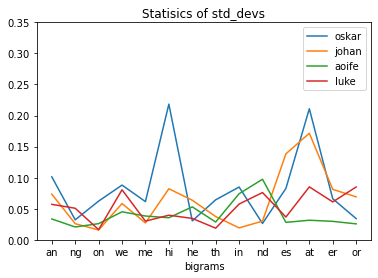

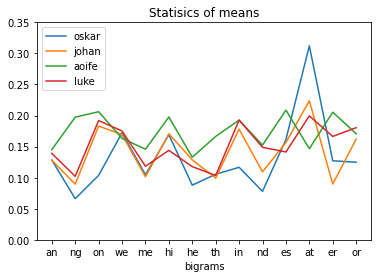

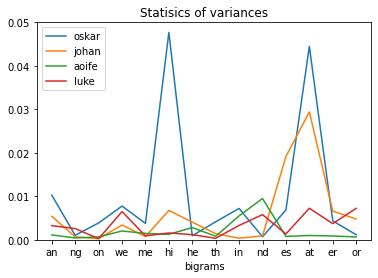

In [3]:
for stat_key in stat_keys:
	print_graph(stats, stat_key, common_bigrams, users)
	

MSE for  std_devs : Between Test(Oskar) and  oskar  =  0.003078741347824013 /n
MSE for  std_devs : Between Test(Aoife) and  oskar =  0.013778608730808368 /n
MSE for  means : Between Test(Oskar) and  oskar  =  0.0006926616728866788 /n
MSE for  means : Between Test(Aoife) and  oskar =  0.006511005937677783 /n
MSE for  variances : Between Test(Oskar) and  oskar  =  0.0003103416074596793 /n
MSE for  variances : Between Test(Aoife) and  oskar =  0.001191913796914567 /n
MSE for  std_devs : Between Test(Oskar) and  johan  =  0.0017555664782252212 /n
MSE for  std_devs : Between Test(Aoife) and  johan =  0.00867840286279715 /n
MSE for  means : Between Test(Oskar) and  johan  =  0.002966272182546561 /n
MSE for  means : Between Test(Aoife) and  johan =  0.0036105253721369843 /n
MSE for  variances : Between Test(Oskar) and  johan  =  0.0002892914547496615 /n
MSE for  variances : Between Test(Aoife) and  johan =  0.000910133101608359 /n
MSE for  std_devs : Between Test(Oskar) and  aoife  =  0.00733

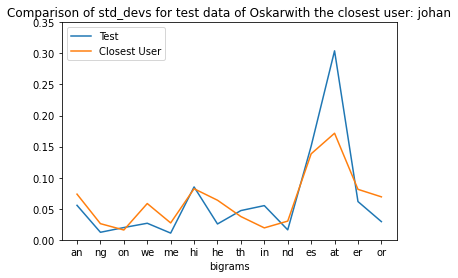

Closest user for Test(Aoife) for  std_devs  is  luke  =  0.005745249582232899


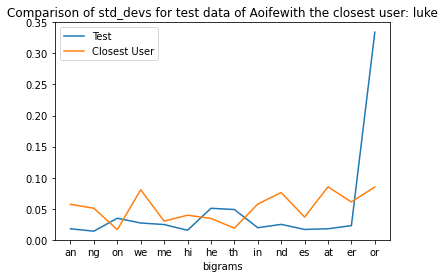

Closest user for Test(Oskar) for  means  is  oskar  =  0.0006926616728866788


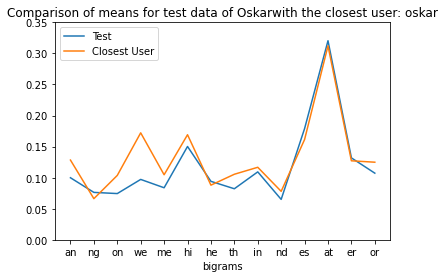

Closest user for Test(Aoife) for  means  is  aoife  =  0.0011678196044894481


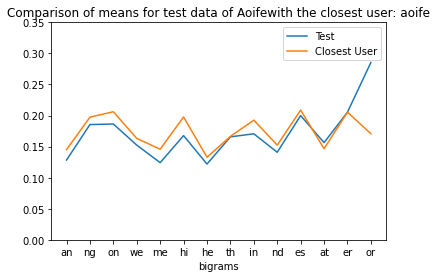

Closest user for Test(Oskar) for  variances  is  johan  =  0.0002892914547496615


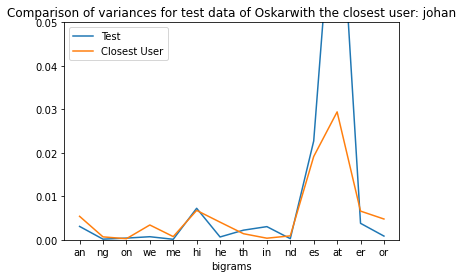

Closest user for Test(Aoife) for  variances  is  luke  =  0.0007896849840939767


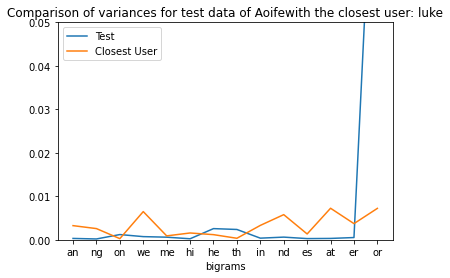

In [15]:
MSE_oskar = {}
MSE_aoife = {}
closest_user_oskar = {'std_devs': '', 'means': '', 'variances': ''}
closest_user_aoife = {'std_devs': '', 'means': '', 'variances': ''}

for user in users:
	MSE_oskar[user] = {}
	MSE_aoife[user] = {}
	for stat_key in stat_keys:
		MSE_oskar[user][stat_key] = mse(stats[user][stat_key], test_stats_oskar[stat_key])
		MSE_aoife[user][stat_key] = mse(stats[user][stat_key], test_stats_aoife[stat_key])
		print('MSE for ', stat_key, ': Between Test(Oskar) and ', user,' = ', MSE_oskar[user][stat_key], '/n')
		print('MSE for ', stat_key, ': Between Test(Aoife) and ', user,'= ' , MSE_aoife[user][stat_key], '/n')


for stat_key in stat_keys:
	closest_user_oskar[stat_key] = find_closest_user(MSE_oskar, stat_key)
	print('Closest user for Test(Oskar) for ', stat_key,' is ', closest_user_oskar[stat_key], ' = ', MSE_oskar[closest_user_oskar[stat_key]][stat_key])
	print_closest_user_graph(stats, test_stats_oskar, closest_user_oskar[stat_key], stat_key, common_bigrams, 'Oskar')
	closest_user_aoife[stat_key] = find_closest_user(MSE_aoife, stat_key)
	print('Closest user for Test(Aoife) for ', stat_key,' is ', closest_user_aoife[stat_key], ' = ', MSE_aoife[closest_user_aoife[stat_key]][stat_key])
	print_closest_user_graph(stats, test_stats_aoife, closest_user_aoife[stat_key], stat_key, common_bigrams, 'Aoife')
	